In [ ]:
# Importing the required libraries

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

In [ ]:
pip install millify

  Created wheel for millify: filename=millify-0.1.1-cp37-none-any.whl size=1866 sha256=dc0a9ca40b8d42f6172f12d9cd859bbc31483a6124278a84259ab73d3d0cb0fb
  Stored in directory: /root/.cache/pip/wheels/19/7d/d9/3f1ca52c5b6c4f05b11f1ab5a088fc1cf6174965e81308faeb
Successfully built millify


In [ ]:
pip install textblob

In [ ]:
# importing other libraries

from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# getting the data

df = pd.read_csv('covid19_tweets.csv',header=0) 

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [ ]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [ ]:
df.isna().sum()


user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [ ]:
# Plotting the missing values  

missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

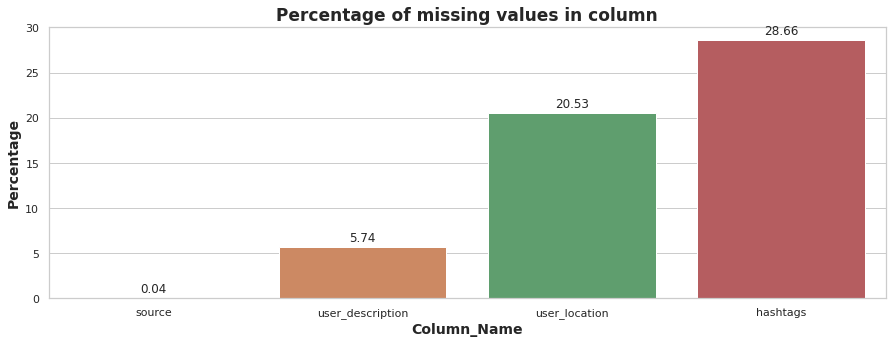

In [ ]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
# Function for plotting User names, User location, source

def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

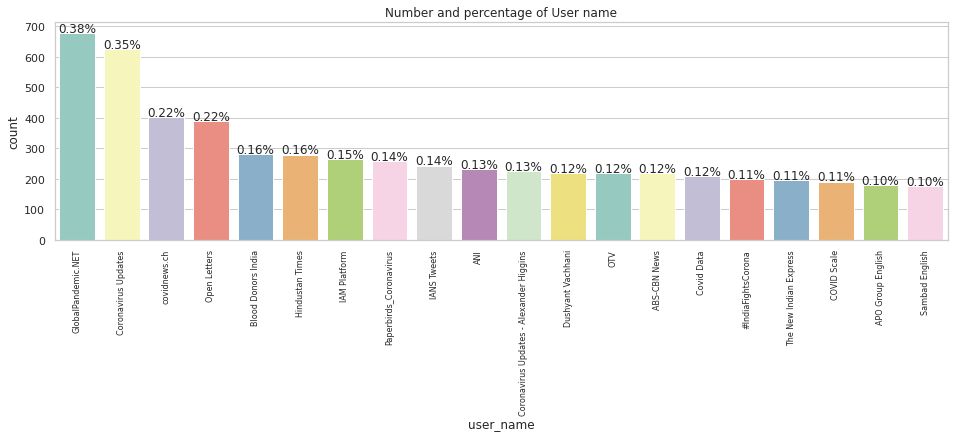

In [ ]:
plot_count("user_name", "User name", df,4)

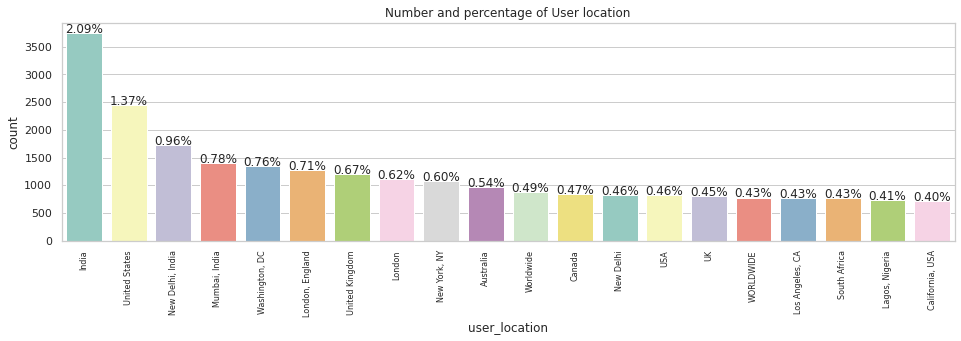

In [ ]:
plot_count("user_location", "User location", df,4)

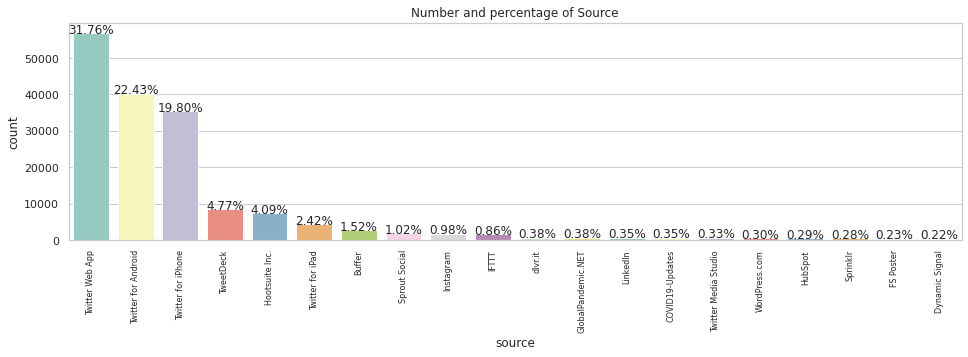

In [ ]:
plot_count("source", "Source", df,4)

In [ ]:
df_username_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

In [ ]:
df = pd.merge(df, df_username_count, on='user_name')

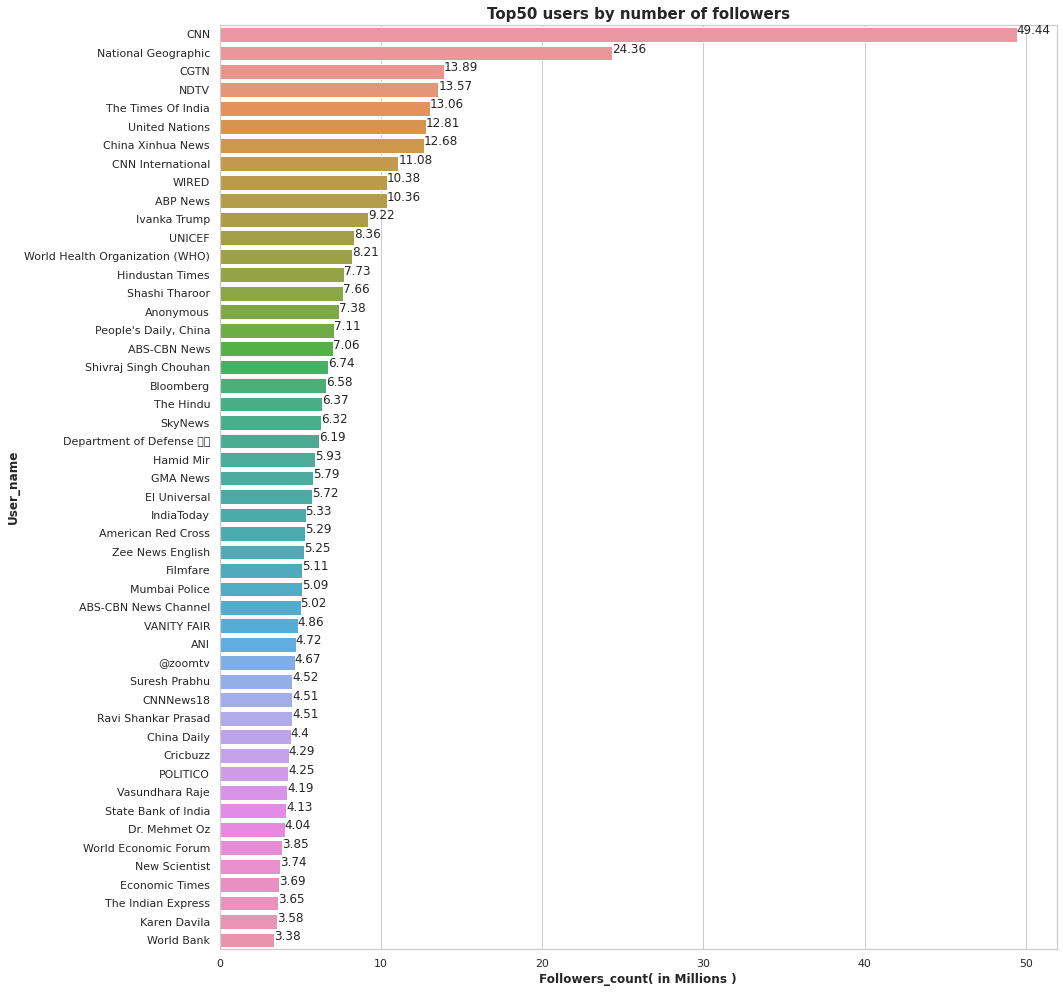

In [ ]:
# Getting the Top Users

data = df.sort_values('user_followers',ascending=False).drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_followers', 'tweet_count']]
data.sort_values('user_followers',ascending=False)

data1 = data.head(50).reset_index().copy()
for i in range(50):
    data1['user_followers'][i] = millify(data1['user_followers'][i],precision=2)
    
data1['user_followers'] = data1['user_followers'].str[:-1].astype(float) # To remove 'M'

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='user_followers',data=data1.head(50))
y=data1['user_followers'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of followers',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Followers_count( in Millions )', size=12, weight='bold')
plt.show()

In [ ]:
# Getting the Tweets user name that are tweeting about COVID-19

def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature),weight='bold', size=15)
    plt.ylabel('Frequency', size=12, weight='bold')
    plt.xlabel(title, size=12, weight='bold')
    plt.xticks(rotation=90)
    plt.show()

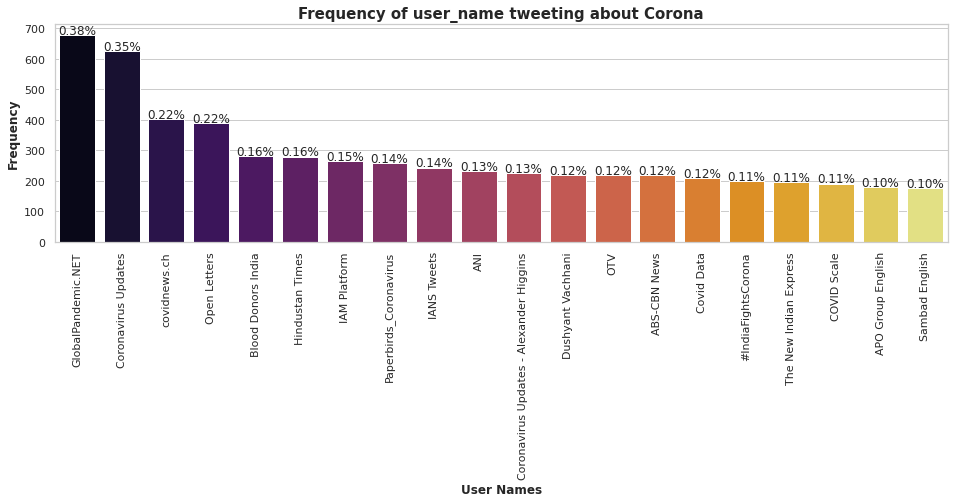

In [ ]:
plot_frequency_charts(df, 'user_name', 'User Names','inferno')

In [ ]:

df = df.fillna('None')

def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)

In [ ]:
# Using word cloud to show the plotting

stop_words=set(STOPWORDS)
source_string = " ".join(df['source'].astype('str'))
hastage_string = " ".join(df['hashtags'].astype('str'))
location_string = " ".join(df['user_location'].astype('str'))

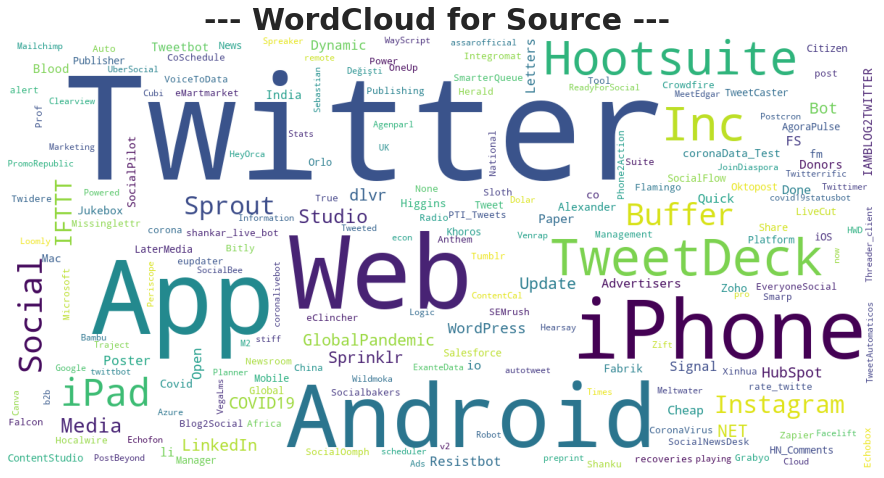

In [ ]:
wordcloud(source_string,'Source','white')

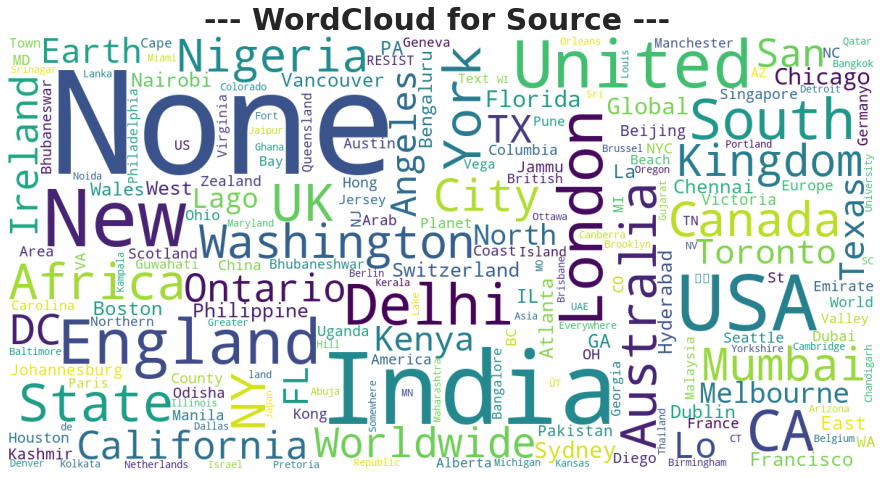

In [ ]:
wordcloud(location_string,'Source','white')

In [ ]:
# Importing the NLTK 

import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from textblob import TextBlob
from textblob import Word

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Cleaning all the stop words

stop_words = set(stopwords.words('english'))

def tweet_scrubber(tweet):
   
    # Make tweets all lower case
    tweet = tweet.lower()
#     # Remove Mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+','',tweet)
#     # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
#     # Remove Numbers
    tweet = re.sub(r"[0-9]*", "", tweet)
#     # Remove Special Characters, and Punctuations
    tweet = re.sub(r"(”|“|-|\+|`|#|,|;|\|)*", "", tweet)
    tweet = re.sub(r"&amp", "", tweet)
    
    to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
    tweet = re.sub(to_remove, " ", tweet)
    return tweet

def tokenization_and_stem(tweet, stem=False, lemmatize=False):
        
    filtered_tweet = []
    words = word_tokenize(tweet) 

    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if lemmatize:
                filtered_tweet.append(Word(word).lemmatize())
            else:
                filtered_tweet.append(word)
            
    return filtered_tweet


In [ ]:
# Lemmatizing the data

df.text = df.text.apply(lambda x: tokenization_and_stem(tweet_scrubber(x), lemmatize=True))

In [ ]:
df.text.head()

0    [smelled, scent, hand, sanitizers, today, some...
1    [miss, isopropyl, alcohol, much, ethanol, hand...
2             [hey, made, sense, player, pay, respect]
3    [trump, never, claimed, covid, hoax, claim, ef...
4    [seen, enough, error, know, covid, flare, fl, ...
Name: text, dtype: object

In [ ]:
# Function for the Sentimental Analysis

def sentiment_analysis(df):
    
    # Determine polarity and subjectivity
    df['Polarity'] = df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['text','Polarity','Subjectivity','Sentiment']].head()

In [ ]:
sentiment_analysis(df)

,text,Polarity,Subjectivity,Sentiment
0,"[smelled, scent, hand, sanitizers, today, some...",-0.25,0.25,negative
1,"[miss, isopropyl, alcohol, much, ethanol, hand...",0.20,0.20,positive
2,"[hey, made, sense, player, pay, respect]",0.00,0.00,neutral
3,"[trump, never, claimed, covid, hoax, claim, ef...",0.00,0.00,neutral
4,"[seen, enough, error, know, covid, flare, fl, ...",0.00,0.50,neutral


In [ ]:
df['Sentiment'].value_counts()

neutral     78593
positive    70988
negative    29527
Name: Sentiment, dtype: int64

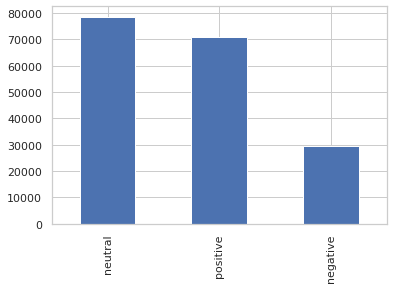

In [ ]:
# sentiments Plot

df['Sentiment'].value_counts().plot(kind='bar')